In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "TSLA"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
...,...,...,...,...,...,...
2023-05-02,161.880005,165.490005,158.929993,160.309998,160.309998,128259700
2023-05-03,160.009995,165.000000,159.910004,160.610001,160.610001,119728000
2023-05-04,162.710007,162.949997,159.649994,161.199997,161.199997,95108500


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2101 entries, 2015-01-02 to 2023-05-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2101 non-null   float64
 1   High       2101 non-null   float64
 2   Low        2101 non-null   float64
 3   Close      2101 non-null   float64
 4   Adj Close  2101 non-null   float64
 5   Volume     2101 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 114.9 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-02,161.880005,165.490005,158.929993,160.309998,160.309998,128259700
2023-05-03,160.009995,165.000000,159.910004,160.610001,160.610001,119728000
2023-05-04,162.710007,162.949997,159.649994,161.199997,161.199997,95108500
2023-05-05,163.970001,170.789993,163.509995,170.059998,170.059998,107440900
2023-05-08,173.720001,173.800003,169.190002,171.789993,171.789993,112036500


In [7]:
data.shape

(2101, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2.101000e+03
mean,92.259692,94.347352,89.970437,92.208124,92.208124,1.134474e+08
std,107.926117,110.417543,105.115378,107.789117,107.789117,7.962179e+07
min,9.488000,10.331333,9.403333,9.578000,9.578000,1.062000e+07
25%,16.417334,16.610666,16.158001,16.410000,16.410000,6.446250e+07
50%,22.368668,22.833332,22.000668,22.341333,22.341333,8.976600e+07
75%,190.520004,194.759995,184.836670,189.979996,189.979996,1.328235e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

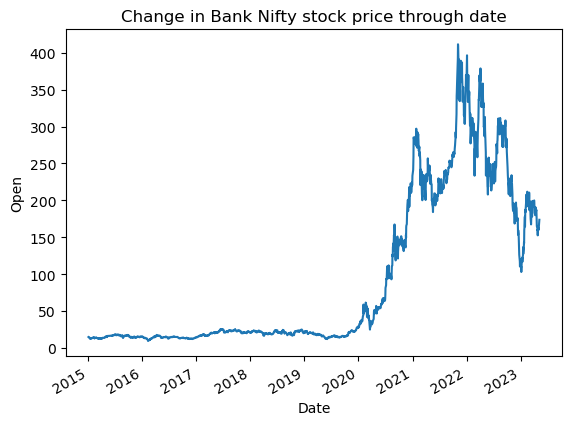

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Bank Nifty stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((1575, 3), (526, 3))

In [15]:
y_train.shape,y_test.shape

((1575,), (526,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[ 20.12892666 253.67750198 268.47450226  16.55593292  17.39903311
  22.95400642 273.10067017  21.16520687  13.48474003  18.1742067
 268.77483704  57.61067219  16.99270704 135.36859863  20.73492659
 241.91173233 214.81543243  22.30441961 160.21799896  23.48162666
  17.48073345  14.621133   205.39976593 222.88616852 226.75769806
 300.34039948  16.29930056 363.41013153  13.4612402   19.91082624
  22.76999353  20.9065666   21.02182693  24.35117914 100.11329521
  17.31964693  21.9155801   12.40656671  14.61427335  15.41219337
  18.45160683 334.90373474 305.72146179  92.90148155 181.37336868
 244.71626907 138.96096848  15.4670201  217.30296661  20.85584707
 296.46376678 242.69133179  13.75530681  22.82648446  13.10811986
 361.35680145  15.5116203  291.66723602  18.56707291  17.51966028
 335.50417206 232.50859863 269.9659726   14.05628015 144.68506577
  27.17475365  32.68072069  16.78816692 184.16946518  15.2716466
 285.7442691  221.54266678  21.9889868  243.49556824  15.78434011
 140.2403395

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9993029735921239


In [22]:
y_test=list(y_test)

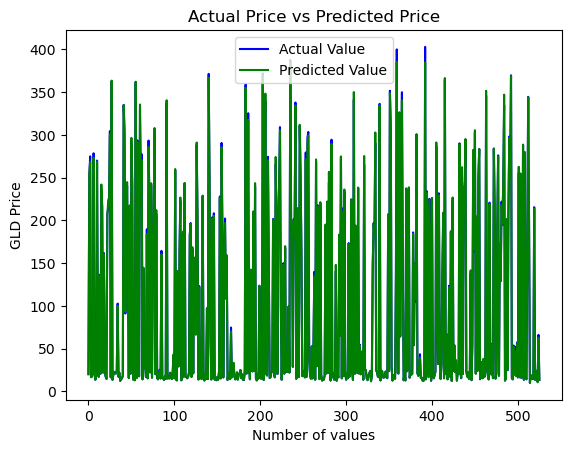

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

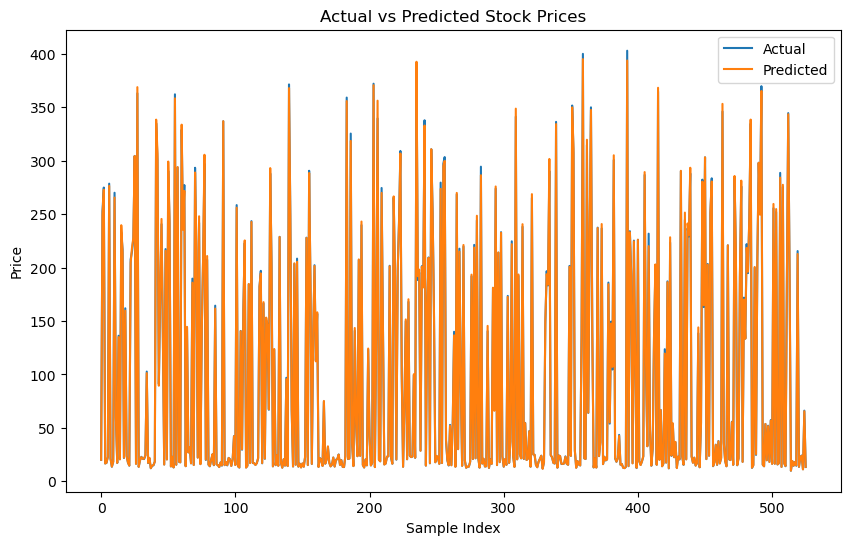

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([ 14.39332224,  14.04905466,  13.95936976, ..., 160.38621526,
       169.4535912 , 170.06686335])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value343
enter a value43543
enter a value3453
41644.60063159611


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("tesla_model.pkl",'wb')
pickle.dump(model,file)